In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Load the data
data = pd.read_csv("Epileptic Seizure Recognition.csv")

# Drop the first column (Unnamed)
data = data.drop(columns=['Unnamed'])

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # Features are all columns except the last one
y = data.iloc[:, -1].values   # The last column is the target

# Convert seizure labels to binary (0: No seizure, 1: Seizure)
y[y > 1] = 0


In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
#Support Vector Machine (SVM)

# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train_scaled, y_train)

# Evaluate the SVM model
svm_predictions = svm_model.predict(X_test_scaled)
print("SVM Results")
print(classification_report(y_test, svm_predictions))
print(confusion_matrix(y_test, svm_predictions))


SVM Results
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1866
           1       1.00      0.08      0.15       434

    accuracy                           0.83      2300
   macro avg       0.91      0.54      0.53      2300
weighted avg       0.86      0.83      0.76      2300

[[1866    0]
 [ 399   35]]


In [5]:
#Random Forest

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate the Random Forest model
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Results")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))


Random Forest Results
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1866
           1       0.93      0.93      0.93       434

    accuracy                           0.97      2300
   macro avg       0.96      0.96      0.96      2300
weighted avg       0.97      0.97      0.97      2300

[[1835   31]
 [  29  405]]


In [6]:
#Naive Bayes

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate the Naive Bayes model
nb_predictions = nb_model.predict(X_test_scaled)
print("Naive Bayes Results")
print(classification_report(y_test, nb_predictions))
print(confusion_matrix(y_test, nb_predictions))


Naive Bayes Results
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1866
           1       0.88      0.90      0.89       434

    accuracy                           0.96      2300
   macro avg       0.93      0.94      0.93      2300
weighted avg       0.96      0.96      0.96      2300

[[1810   56]
 [  42  392]]


In [7]:
#Decesion Tree

# Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Evaluate the Decision Tree model
dt_predictions = dt_model.predict(X_test_scaled)
print("Decision Tree Results")
print(classification_report(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))


Decision Tree Results
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1866
           1       0.82      0.83      0.83       434

    accuracy                           0.93      2300
   macro avg       0.89      0.90      0.89      2300
weighted avg       0.93      0.93      0.93      2300

[[1785   81]
 [  72  362]]


In [8]:
#Results

models = {
    "SVM": svm_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model,
    "Decision Tree": dt_model
}

for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    print(f"{name} Results")
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print("\n" + "="*50 + "\n")


SVM Results
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1866
           1       1.00      0.08      0.15       434

    accuracy                           0.83      2300
   macro avg       0.91      0.54      0.53      2300
weighted avg       0.86      0.83      0.76      2300

[[1866    0]
 [ 399   35]]


Random Forest Results
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1866
           1       0.93      0.93      0.93       434

    accuracy                           0.97      2300
   macro avg       0.96      0.96      0.96      2300
weighted avg       0.97      0.97      0.97      2300

[[1835   31]
 [  29  405]]


Naive Bayes Results
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1866
           1       0.88      0.90      0.89       434

    accuracy                           0.96      2300
   macro avg    

In [9]:
#Visualization

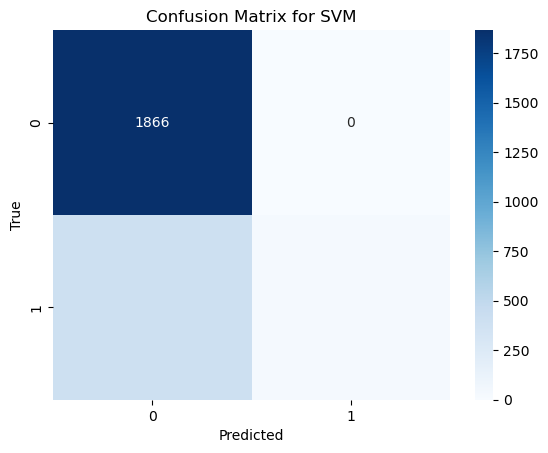

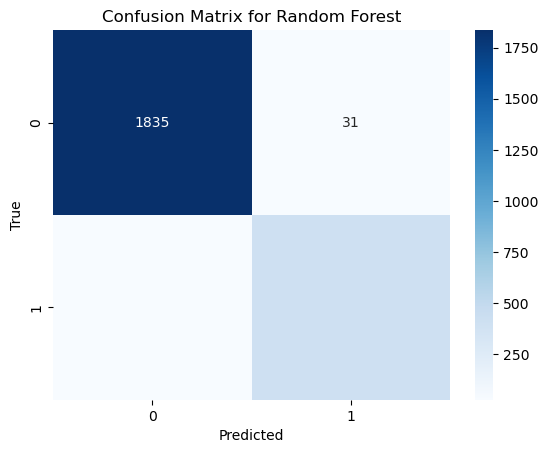

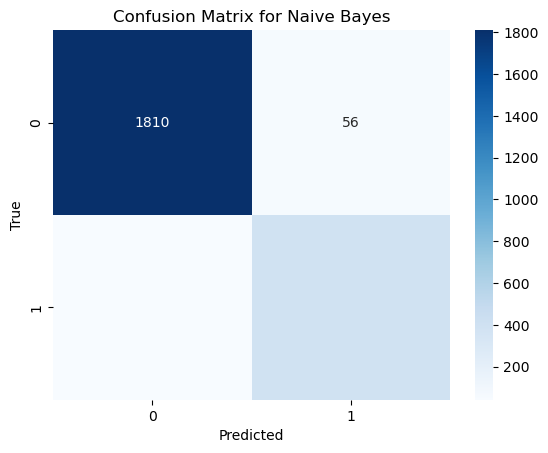

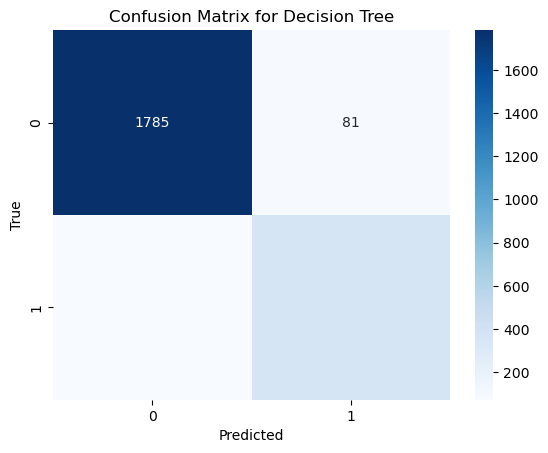

In [10]:
#Confusion Matrix Visualiztion
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot confusion matrices for all models
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    plot_confusion_matrix(y_test, predictions, f"Confusion Matrix for {name}")

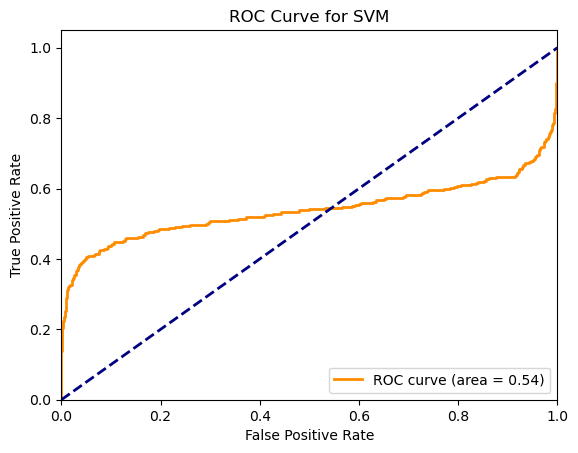

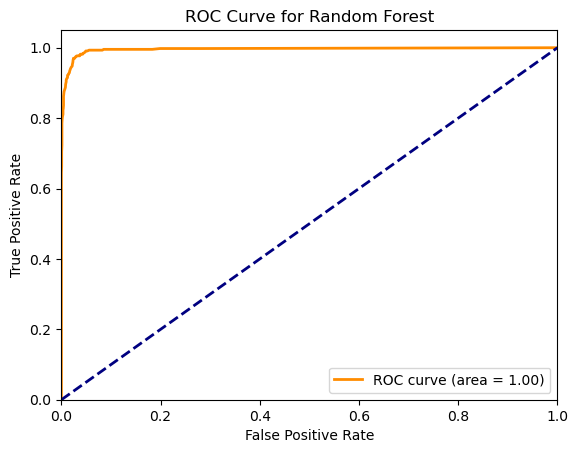

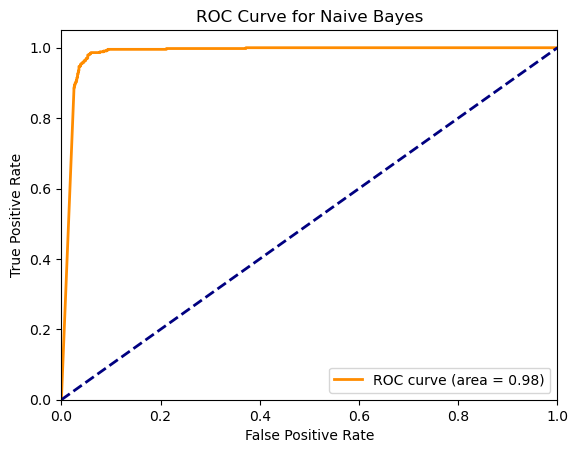

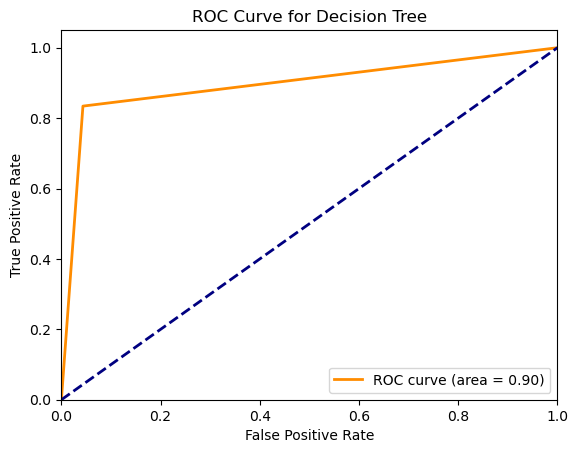

In [11]:
#ROC Curve and AUC
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for all models
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_prob = model.decision_function(X_test_scaled)
    
    plot_roc_curve(y_test, y_prob, f"ROC Curve for {name}")


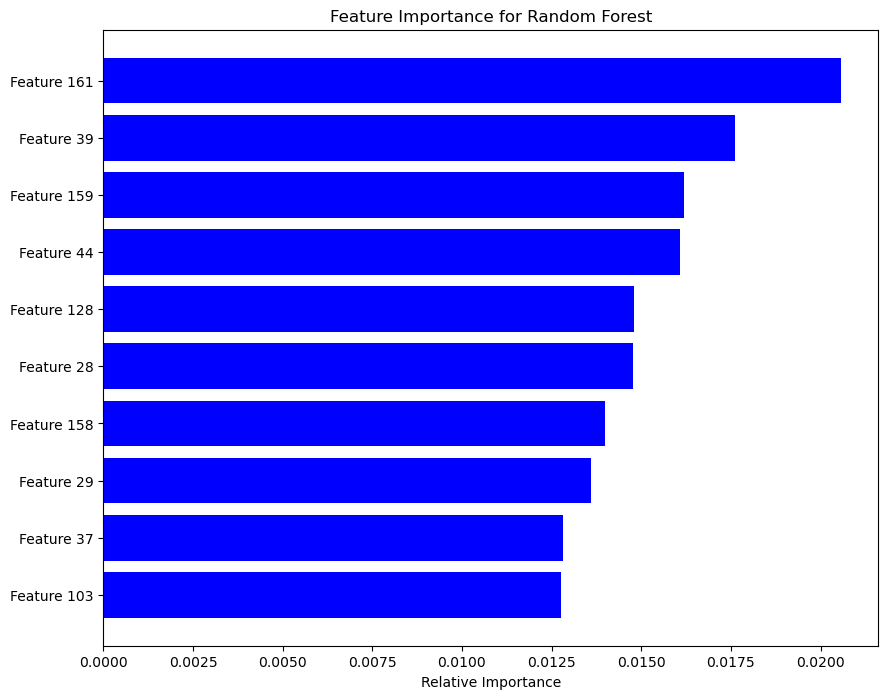

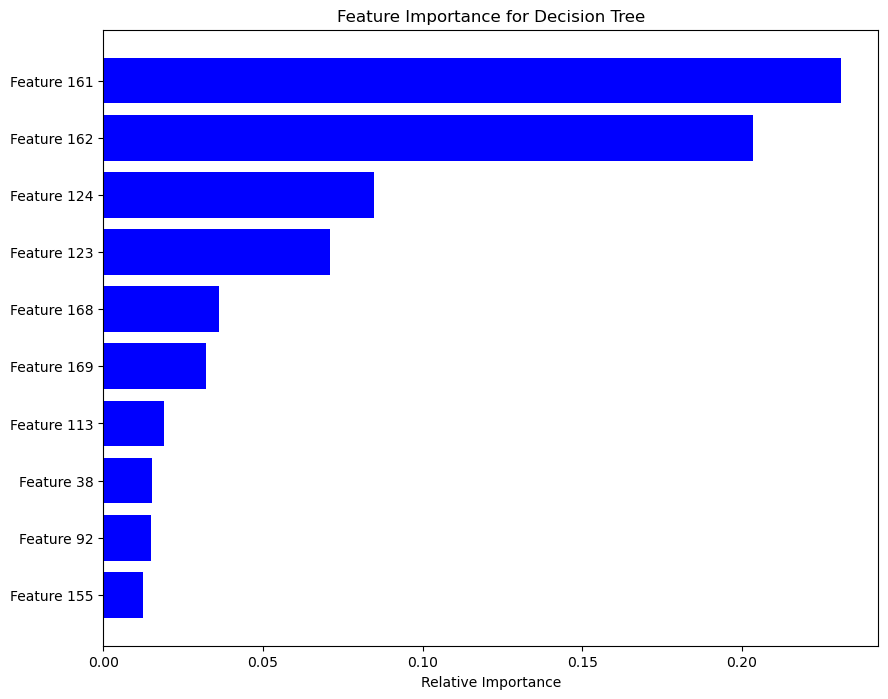

In [12]:
#Feature Importance (for Decision Tree and Random Forest)
def plot_feature_importance(model, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)[-10:]  # Top 10 features
    plt.figure(figsize=(10, 8))
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [f"Feature {i+1}" for i in indices])
    plt.xlabel("Relative Importance")
    plt.title(title)
    plt.show()

# Plot feature importance for Decision Tree and Random Forest
plot_feature_importance(rf_model, "Feature Importance for Random Forest")
plot_feature_importance(dt_model, "Feature Importance for Decision Tree")


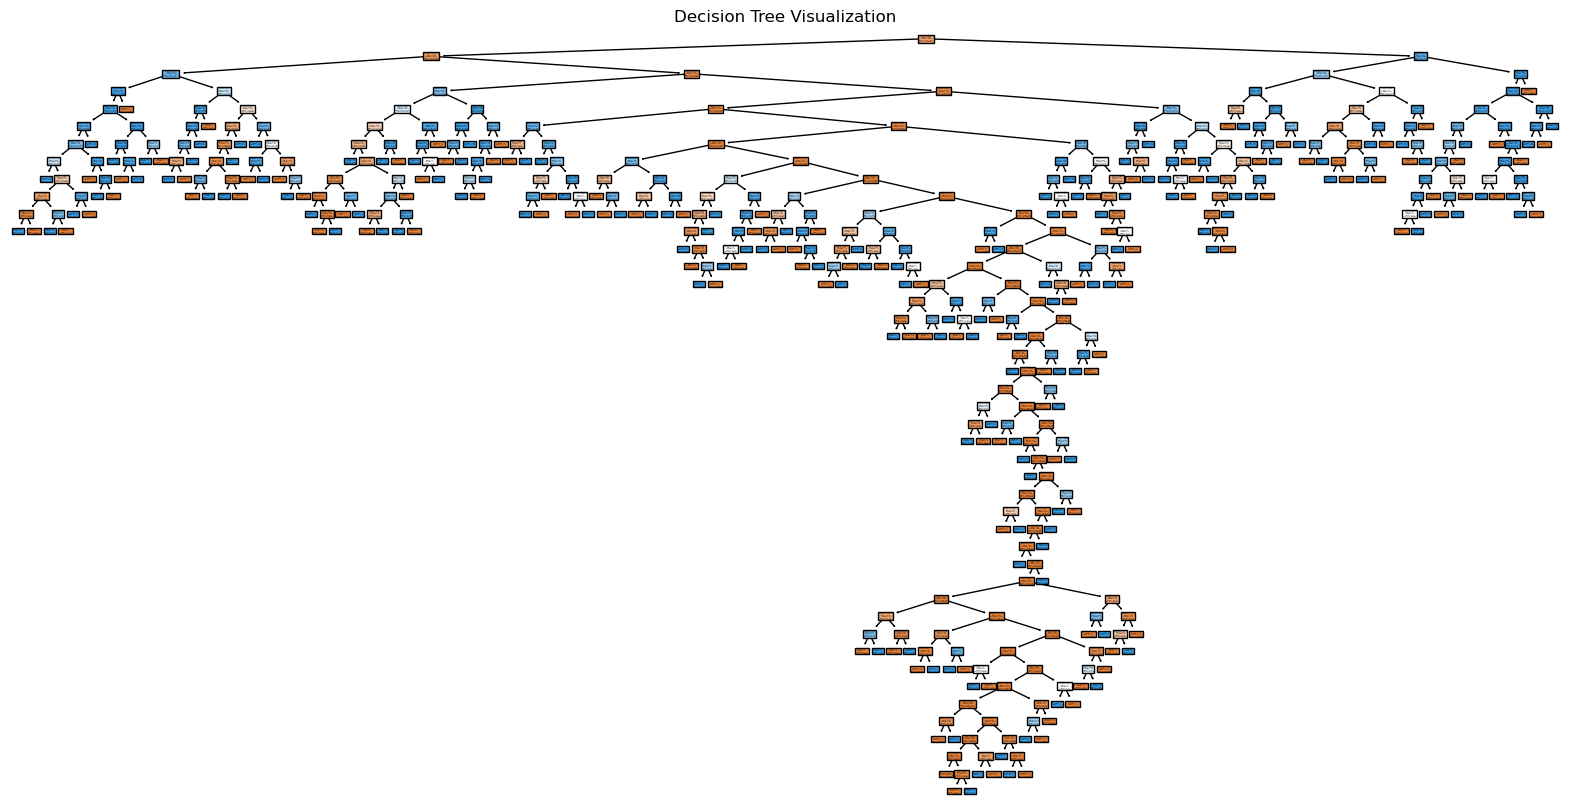

In [13]:
#Decision Tree Visualization
from sklearn import tree

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, filled=True, feature_names=[f"X{i+1}" for i in range(X.shape[1])], class_names=["No Seizure", "Seizure"])
plt.title("Decision Tree Visualization")
plt.show()
